# Imbalanced data handling techniques
Imbalanced data refers to a situation in which the classes of a classification problem have significantly unequal numbers of instances. For instance, in a binary classification problem, one class may have a much larger number of examples compared to the other class. Imbalanced data can pose challenges for machine learning algorithms because they tend to bias the model toward the majority class, leading to poor performance on the minority class.

To address the challenges posed by imbalanced data, various techniques can be employed. Here are some common imbalanced data handling techniques:

1. **Resampling Techniques:**
   - **Oversampling:** Increasing the number of instances in the minority class by duplicating existing samples or generating synthetic samples.
   - **Undersampling:** Reducing the number of instances in the majority class by randomly removing samples.
   - **SMOTE (Synthetic Minority Over-sampling Technique):** Generates synthetic samples by interpolating between existing minority class instances.
   - **ADASYN (Adaptive Synthetic Sampling):** Similar to SMOTE, but focuses on generating samples in regions of the feature space where the density of minority samples is low.

2. **Cost-sensitive Learning:**
   - Assigning different misclassification costs to different classes to reflect the imbalance and encourage the model to prioritize the minority class.

3. **Ensemble Techniques:**
   - **Balanced Random Forest:** A modification of the random forest algorithm that balances class distribution during tree construction.
   - **EasyEnsemble:** Creates multiple subsets of the data by undersampling the majority class and trains an ensemble of models on these subsets.

4. **Algorithm-level Approaches:**
   - Modifying existing algorithms to handle imbalanced data more effectively. For example, modifying the decision threshold for classification to better accommodate the minority class.

5. **Data Augmentation:**
   - Introducing small perturbations to the existing data to create new instances while preserving the class label.

6. **Anomaly Detection:**
   - Treating the minority class as an anomaly detection problem, which can involve identifying rare instances using techniques such as one-class SVM or isolation forests.

7. **Transfer Learning:**
   - Leveraging pre-trained models on large datasets to extract relevant features for the imbalanced classification task.

8. **Hybrid Approaches:**
   - Combining multiple techniques to create a more robust solution for handling imbalanced data.

The choice of technique depends on the specific problem, dataset, and the algorithm being used. It's important to carefully evaluate the performance of these techniques on your specific data to determine the most effective approach.


# What are the Techniques to Solve Imbalanced Classes in Machine Learning

1. **Resampling Techniques**:
   - **Oversampling**: Increase the number of instances in the minority class by duplicating or generating synthetic samples.
     - Random Oversampling
     - Synthetic Minority Over-sampling Technique (SMOTE)
   - **Undersampling**: Decrease the number of instances in the majority class by removing some instances.
     - Random Undersampling
     - Cluster Centroids
   - **Combination**: A combination of oversampling and undersampling approaches can also be used.

2. **Cost-Sensitive Learning**:
   - Assign different misclassification costs to different classes to reflect their importance.

3. **Ensemble Methods**:
   - Use ensemble algorithms that can handle imbalanced classes inherently, such as Random Forest and Balanced Random Forest.
   - Boosting algorithms like AdaBoost, XGBoost, and LightGBM often perform well on imbalanced data.

4. **Anomaly Detection**:
   - Treat the minority class as an anomaly detection problem and use techniques like One-Class SVM.

5. **Modified Algorithms**:
   - Modify existing algorithms to incorporate class imbalance handling, such as modifying the decision threshold for classification.

6. **Data Augmentation**:
   - Generate new training instances for the minority class by applying various data augmentation techniques.

7. **Feature Engineering**:
   - Create informative features that help the model distinguish between classes better.

8. **Synthetic Data Generation**:
   - Generate synthetic data points using techniques like Gaussian Mixture Models (GMMs) or Kernel Density Estimation (KDE).

9. **Evaluation Metrics**:
   - Use appropriate evaluation metrics like precision, recall, F1-score, ROC-AUC, etc., which provide a better understanding of model performance on imbalanced data.

10. **Resampling within Cross-Validation**:
    - Perform resampling techniques within each fold of cross-validation to avoid data leakage.

11. **Transfer Learning**:
    - Utilize pre-trained models and fine-tune them on your imbalanced dataset.

12. **Domain Knowledge**:
    - Incorporate domain knowledge to guide the model's learning process.

When selecting a technique, it's important to consider the characteristics of your dataset and the specific problem you're solving. There is no one-size-fits-all solution, so experimentation and understanding the implications of each technique are crucial. Additionally, it's recommended to combine multiple techniques and evaluate their impact on your specific problem to achieve the best results.

# 10 Techniques to Solve Imbalanced Classes in Machine Learning 

#### 1. Random Under-Sampling
#### 2. Random Over-Sampling
#### 3. Random Under-Sampling With Imblearn
#### 4. Random Over-Sampling With imblearn
#### 5. Under-Sampling: Tomek Links
#### 6. Synthetic Minority Oversampling Technique (SMOTE)
#### 7. NearMiss
#### 8. Change the Performance Metric
#### 9. Penalize Algorithms (Cost-Sensitive Training)
#### 10. Change the Algorithm

Refer: https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

## 1. Random Under-Sampling 
Random Under-Sampling is a data imbalance technique that involves randomly removing instances from the majority class to create a more balanced dataset, which helps improve the performance of machine learning models in handling skewed class distributions.


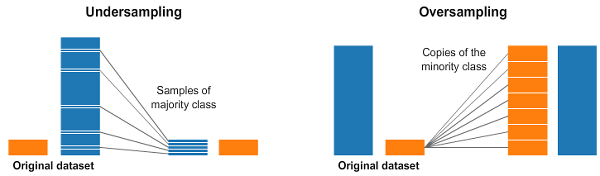

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('train.csv')

target_count = data['target'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

# Create a bar chart
plt.bar(target_count.index, target_count.values)
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Distribution of Target Classes')
plt.xticks(target_count.index, ['Class 0', 'Class 1'])  
plt.show()


In [ ]:
# Random Under-Sampling procedure

# Separate the data into different classes
class_0 = data[data['target'] == 0]
class_1 = data[data['target'] == 1]

# Class count
count_class_0, count_class_1 = data['target'].value_counts()

# Determine the size of the minority class
min_class_size = count_class_1

# Randomly sample from the majority class to match the size of the minority class
class_0_under_sampled = class_0.sample(n=min_class_size, random_state=42)

# Combine the under-sampled majority class with the minority class
under_sampled_data = pd.concat([class_0_under_sampled, class_1])

# Shuffle the combined DataFrame to ensure randomness
under_sampled_data = under_sampled_data.sample(frac=1, random_state=42)

# Now you can use under_sampled_data for further analysis or modeling
value=under_sampled_data['target'].value_counts()
print(value)

# Create a bar chart
plt.bar(value.index, value.values)
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Distribution of Target Classes')
plt.xticks(value.index, ['Class 0', 'Class 1'])  
plt.show()


### Problem in Random Under-Sampling 

1. **Loss of Information**: Undersampling involves discarding data from the majority class, which can lead to a loss of valuable information that might be important for training a robust and accurate model. This can potentially decrease the overall performance of the model.

2. **Reduced Generalization**: Removing instances from the majority class can result in a model that is less capable of generalizing to real-world data. The model may become overly sensitive to the remaining instances and might not perform well on new, unseen data.

3. **Sample Representativeness**: Undersampling might inadvertently remove important and informative examples from the majority class, leading to biased or unrealistic training data that does not adequately represent the underlying distribution.

4. **Increased Variance**: With fewer samples in the majority class, the model's predictions can become more sensitive to noise and outliers in the data, potentially leading to overfitting.

5. **Impact on Decision Boundaries**: Undersampling can cause a shift in the decision boundaries of a model, potentially leading to misclassification or poor performance in areas where the majority class data has been removed.

6. **Dependency on Sampling Ratio**: The choice of how much to undersample (the sampling ratio) can have a significant impact on the model's performance. Finding the right balance between class distribution and retaining enough data for accurate learning can be challenging.

7. **Increased Training Time**: While undersampling reduces the size of the majority class, the overall dataset size decreases, which can lead to faster training times. However, if the dataset is already small, further reduction in size through undersampling might not be feasible.


## 2. Random Over-Sampling
Random Over-Sampling is a technique in machine learning where instances from the minority class are duplicated randomly to balance class distribution, mitigating class imbalance issues.


In [ ]:
# Random Over-Sampling procedure

# Separate the data into different classes
class_0 = data[data['target'] == 0]
class_1 = data[data['target'] == 1]

# Class count
count_class_0, count_class_1 = data['target'].value_counts()

# Determine the size of the majority class
max_class_size = count_class_0

# Randomly sample from the minority class with replacement to match the size of the majority class
class_1_over_sampled = class_1.sample(n=max_class_size, replace=True, random_state=42)

# Combine the over-sampled minority class with the majority class 
over_sampled_data = pd.concat([class_0, class_1_over_sampled])

# Shuffle the combined DataFrame to ensure randomness
over_sampled_data = over_sampled_data.sample(frac=1, random_state=42)

# Now you can use overer_sampled_data for further analysis or modeling
value = over_sampled_data['target'].value_counts()
print(value)

# Create a bar chart
plt.bar(value.index, value.values)
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Distribution of Target Classes')
plt.xticks(value.index, ['Class 0', 'Class 1'])  
plt.show()


## Problem in Random Oversampling

1. **Overfitting:** Random Oversampling can lead to overfitting, especially when the same minority class instances are repeatedly duplicated. The model may learn these duplicated samples too well, resulting in poor generalization to new, unseen data.

2. **Data Leakage:** When randomly oversampling, identical or very similar instances from the minority class may end up in both the training and validation/testing sets. This data leakage can lead to overly optimistic performance estimates during evaluation, as the model has seen similar examples during training.

3. **Increased Training Time:** As the minority class samples are duplicated, the overall dataset size increases, which can lead to longer training times, especially when working with large datasets.

4. **Reduced Diversity:** Random Oversampling may result in a less diverse dataset as it merely duplicates existing samples. This lack of diversity might limit the model's ability to learn meaningful patterns and lead to suboptimal results.

5. **Misleading Performance Metrics:** When evaluating model performance on an oversampled dataset, metrics such as accuracy can be misleading. The accuracy may appear higher because the model is better at predicting the minority class, but it might still perform poorly on real-world data due to overfitting.


## 6. Synthetic Minority Oversampling Technique (SMOTE)
Synthetic Minority Oversampling Technique (SMOTE) is a data augmentation method designed to address class imbalance in machine learning datasets. It generates synthetic samples for the minority class by interpolating feature vectors between similar instances, thereby improving the model's ability to learn from underrepresented classes.

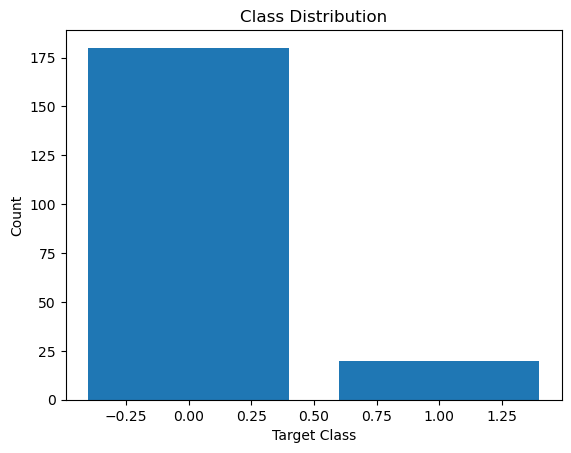

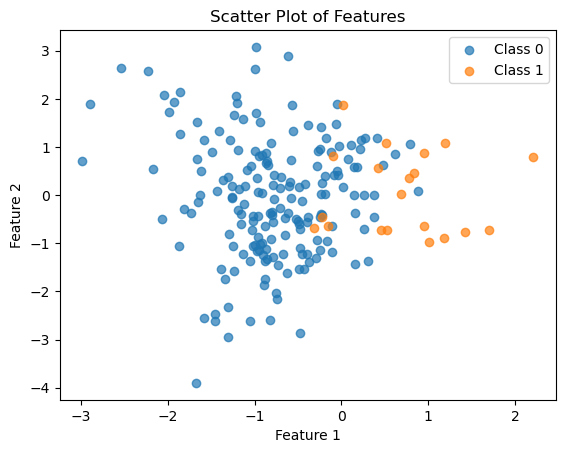

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.combine import SMOTEENN

# Generate a synthetic classification dataset
X, y = make_classification(
    n_classes=2, class_sep=0.75, weights=[0.9, 0.1],
    n_informative=2, n_redundant=0, flip_y=0,
    n_features=2, n_clusters_per_class=2,
    n_samples=200, random_state=10)

# Create a DataFrame from the generated dataset
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

# Plot the class distribution using a bar chart
target_counts = df['Target'].value_counts()
plt.bar(target_counts.index, target_counts.values)
plt.title('Class Distribution')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

# Plot a scatter plot of the features colored by the target class
plt.scatter(df[df['Target'] == 0]['Feature 1'], df[df['Target'] == 0]['Feature 2'], label='Class 0', alpha=0.7)
plt.scatter(df[df['Target'] == 1]['Feature 1'], df[df['Target'] == 1]['Feature 2'], label='Class 1', alpha=0.7)
plt.title('Scatter Plot of Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


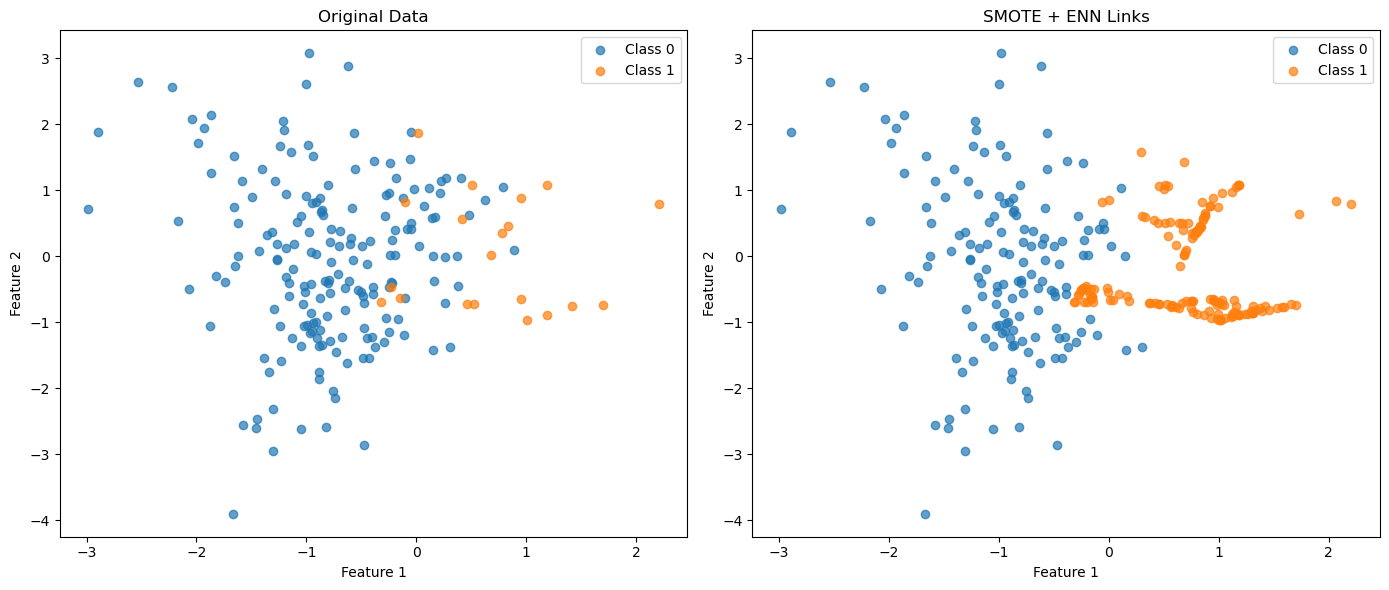

In [2]:
# Apply SMOTE + ENN resampling technique
smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X, y)

# Create subplots for before and after SMOTE + ENN
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualize the original dataset in 2D space (left side)
scatter_original = axes[0].scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.7)
scatter_original = axes[0].scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.7)
axes[0].set_title('Original Data')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].legend()

# Visualize the resampled dataset in 2D space (right side)
scatter_resampled = axes[1].scatter(X_smt[y_smt == 0][:, 0], X_smt[y_smt == 0][:, 1], label='Class 0', alpha=0.7)
scatter_resampled = axes[1].scatter(X_smt[y_smt == 1][:, 0], X_smt[y_smt == 1][:, 1], label='Class 1', alpha=0.7)
axes[1].set_title('SMOTE + ENN Links')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()

plt.tight_layout()
plt.show()
